<a href="https://colab.research.google.com/github/UzmaMahmoodSSUET/bootcamp_datasci/blob/main/Exam_notebook_14_9_23_car_images_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [3]:
%cd /content/drive/MyDrive/kaggle/

/content/drive/MyDrive/kaggle


In [4]:
! kaggle datasets download -d kshitij192/cars-image-dataset

 91% 33.0M/36.3M [00:02<00:00, 18.3MB/s]
100% 36.3M/36.3M [00:02<00:00, 17.5MB/s]


In [5]:
! kaggle datasets download -d kshitij192/cars-image-dataset --unzip --force

 94% 34.0M/36.3M [00:01<00:00, 37.7MB/s]
100% 36.3M/36.3M [00:01<00:00, 24.7MB/s]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/kaggle/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [8]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.77647066 0.76470596 0.8000001 ]
  [0.77647066 0.76470596 0.8000001 ]
  [0.77647066 0.76470596 0.8000001 ]
  ...
  [0.8078432  0.7960785  0.8235295 ]
  [0.8098704  0.7981057  0.82555676]
  [0.8117648  0.8000001  0.82745105]]

 [[0.77647066 0.76470596 0.8000001 ]
  [0.77647066 0.76470596 0.8000001 ]
  [0.77647066 0.76470596 0.8000001 ]
  ...
  [0.8078432  0.7960785  0.8235295 ]
  [0.8103637  0.798599   0.82605   ]
  [0.8117648  0.8000001  0.82745105]]

 [[0.77647066 0.76470596 0.8000001 ]
  [0.77647066 0.76470596 0.8000001 ]
  [0.77647066 0.76470596 0.8000001 ]
  ...
  [0.8078432  0.7960785  0.8235295 ]
  [0.81085694 0.79909223 0.8265432 ]
  [0.8117648  0.8000001  0.82745105]]

 ...

 [[0.6864403  0.6825187  0.71389127]
  [0.6690629  0.66514134 0.6965139 ]
  [0.6369536  0.633032   0.6644046 ]
  ...
  [0.75294125 0.74509805 0.78823537]
  [0.75294125 0.74509805 0.78823537]
  [0.75294125 0.74509805 0.78823537]]

 [[0.6844673  0.68054575 0.7119183 ]
  [0.6661035  0.6621819  0.69355446]


In [9]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/kaggle/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


## Creating the CNN model

In [12]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [14]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=40
)

Epoch 1/40
105/105 [==============================] - 86s 818ms/step - loss: 0.8537 - accuracy: 0.6933 - val_loss: 1.0118 - val_accuracy: 0.6384
Epoch 2/40
105/105 [==============================] - 86s 816ms/step - loss: 0.8001 - accuracy: 0.7121 - val_loss: 0.9803 - val_accuracy: 0.6765
Epoch 3/40
105/105 [==============================] - 87s 819ms/step - loss: 0.7465 - accuracy: 0.7321 - val_loss: 1.0232 - val_accuracy: 0.6445
Epoch 4/40
105/105 [==============================] - 88s 836ms/step - loss: 0.7009 - accuracy: 0.7470 - val_loss: 1.0421 - val_accuracy: 0.6593
Epoch 5/40
105/105 [==============================] - 83s 785ms/step - loss: 0.6921 - accuracy: 0.7560 - val_loss: 0.9343 - val_accuracy: 0.6925
Epoch 6/40
105/105 [==============================] - 83s 788ms/step - loss: 0.6366 - accuracy: 0.7721 - val_loss: 0.9456 - val_accuracy: 0.6679
Epoch 7/40
105/105 [==============================] - 82s 781ms/step - loss: 0.6399 - accuracy: 0.7736 - val_loss: 0.9424 - val_ac

In [20]:

test_loss, test_acc = model.evaluate(test_generator)

26/26 [==============================] - 14s 533ms/step - loss: 1.2122 - accuracy: 0.7171


In [21]:
test_acc

0.7170971632003784

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix , classification_report,ConfusionMatrixDisplay
from tensorflow.keras import models,layers

## Plotting the accuracy and loss curves

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

40

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8537064790725708,
 0.8001112937927246,
 0.7464908361434937,
 0.7009197473526001,
 0.6920649409294128]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

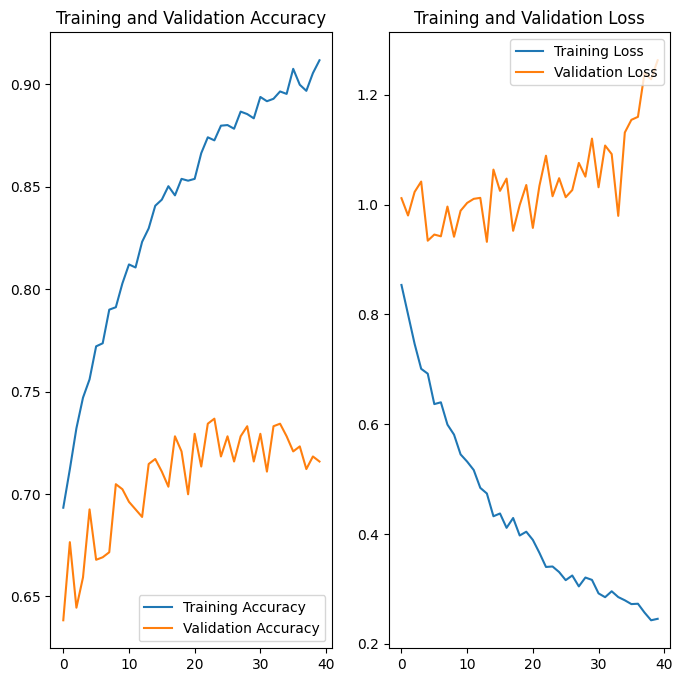

In [28]:
import matplotlib.pyplot as plt
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [38]:
import numpy as np
import cv2
from PIL import Image

1/1 [==============================] - 0s 46ms/step


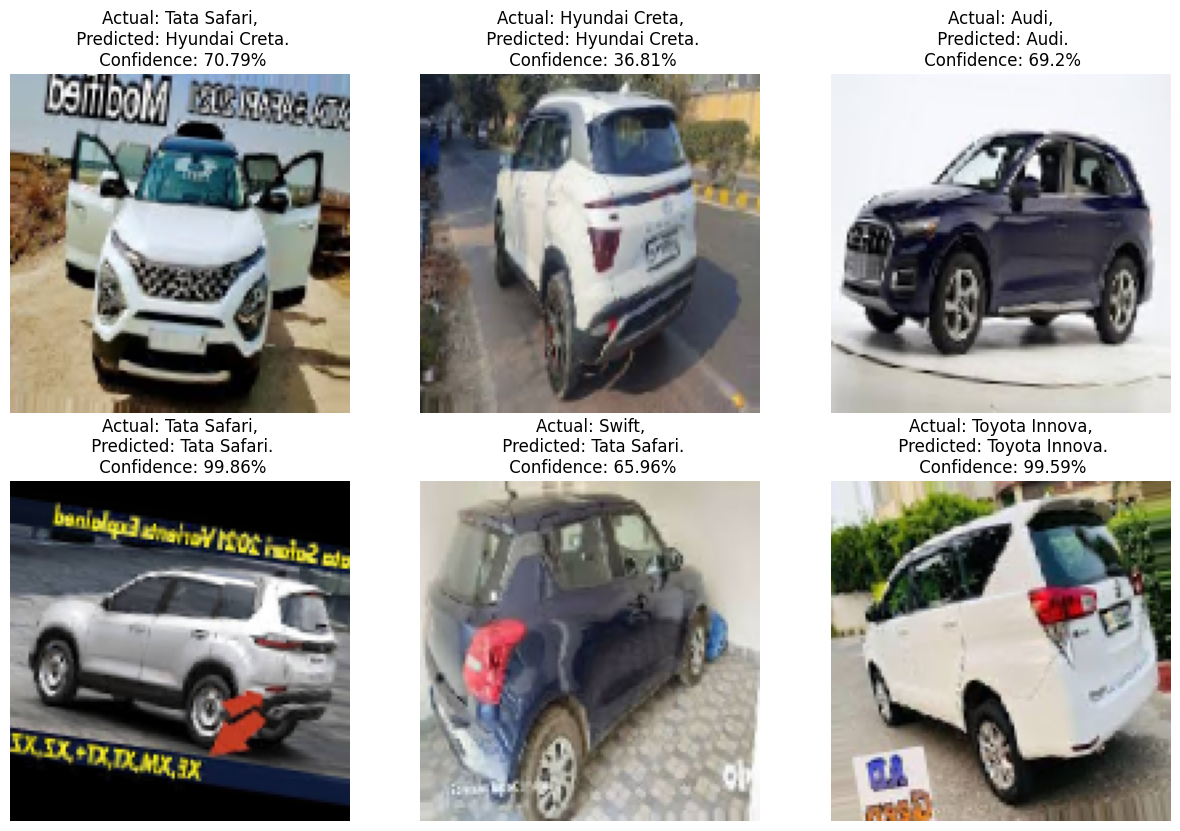

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [50]:
def make_prediction(img):
    img=cv2.imread(img)
    img=Image.fromarray(img)
    img=img.resize((128,128))
    img=np.array(img)
    input_img = np.expand_dims(img, axis=0)
    plt.imshow(img)
    plt.show()
    res = model.predict(input_img)
    res = res.argmax()
    if res == 0 :
      print("car Audi Detected")
    elif res == 1:
      print("hyundai")
    elif res == 2:
      print("Mahindra")
    elif res == 3:
      print("Rolls")
    elif res == 4:
      print("Swift")
    elif res == 5:
      print("Tata")
    else:
      print("Toyta")


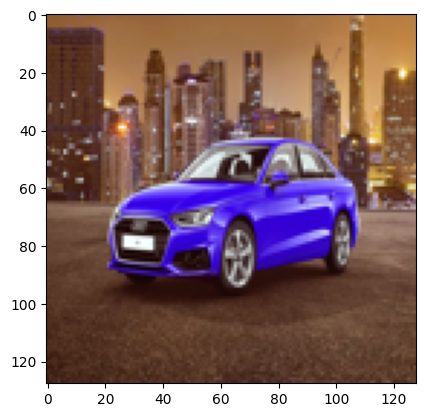

1/1 [==============================] - 0s 35ms/step
car Audi Detected


In [51]:
make_prediction('/content/drive/MyDrive/kaggle/car_test_image.jpeg')

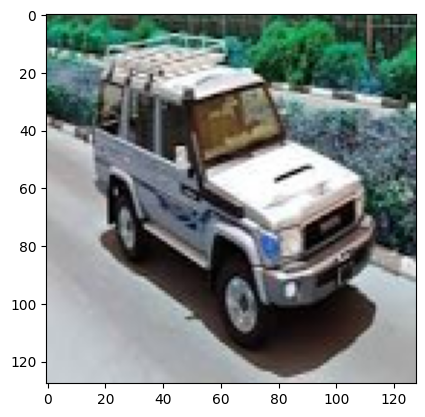

1/1 [==============================] - 0s 46ms/step
Mahindra


In [52]:
make_prediction('/content/drive/MyDrive/kaggle/toyta safri.jpg')

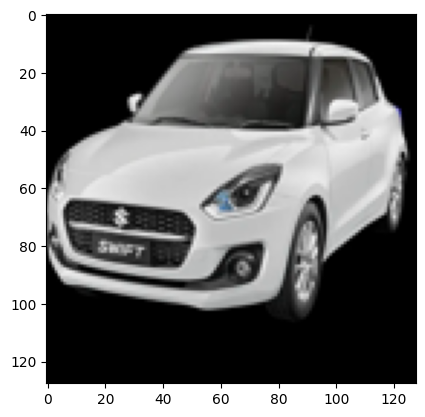

1/1 [==============================] - 0s 25ms/step
car Audi Detected


In [53]:
make_prediction('/content/drive/MyDrive/kaggle/swift-1665990598-prod-var.jpg')

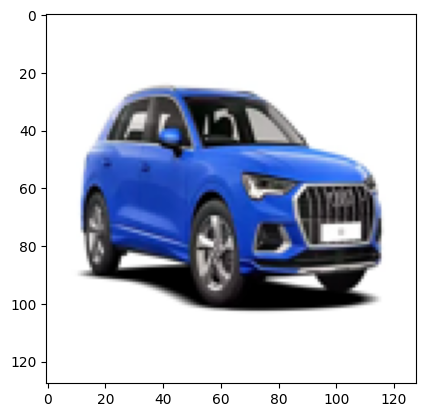

1/1 [==============================] - 0s 27ms/step
car Audi Detected


In [54]:
make_prediction('/content/drive/MyDrive/kaggle/Audi-Q3-300820222026.jpg')